In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_excel('data/Data_.xlsx')

# Split the data into features (X) and target (y)
X = data.drop(columns=['EC'])
y = data['EC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the training and testing sets
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


(57, 5) (15, 5) (57,) (15,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the ANN model structure
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [16]:
# Define a custom callback to print loss and accuracy per epoch
from tensorflow.keras.callbacks import LambdaCallback

print_epoch_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(
        f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, MAE = {logs['mae']:.4f}, "
        f"Val Loss = {logs['val_loss']:.4f}, Val MAE = {logs['val_mae']:.4f}"
    )
)

# Train the model with the custom callback
history = model.fit(
    X_train_scaled, y_train, epochs=5000, batch_size=10, validation_split=0.2, verbose=0,
    callbacks=[print_epoch_callback]
)


Epoch 1: Loss = 40609336.0000, MAE = 5823.0894, Val Loss = 57943648.0000, Val MAE = 6730.5571
Epoch 2: Loss = 40608036.0000, MAE = 5822.9893, Val Loss = 57942100.0000, Val MAE = 6730.4604
Epoch 3: Loss = 40606804.0000, MAE = 5822.8955, Val Loss = 57940532.0000, Val MAE = 6730.3599
Epoch 4: Loss = 40605504.0000, MAE = 5822.7988, Val Loss = 57938964.0000, Val MAE = 6730.2583
Epoch 5: Loss = 40604204.0000, MAE = 5822.6973, Val Loss = 57937292.0000, Val MAE = 6730.1509
Epoch 6: Loss = 40602772.0000, MAE = 5822.5879, Val Loss = 57935324.0000, Val MAE = 6730.0254
Epoch 7: Loss = 40601132.0000, MAE = 5822.4609, Val Loss = 57932948.0000, Val MAE = 6729.8730
Epoch 8: Loss = 40599104.0000, MAE = 5822.3057, Val Loss = 57930140.0000, Val MAE = 6729.6929
Epoch 9: Loss = 40596536.0000, MAE = 5822.1157, Val Loss = 57926812.0000, Val MAE = 6729.4790
Epoch 10: Loss = 40593728.0000, MAE = 5821.8950, Val Loss = 57922720.0000, Val MAE = 6729.2163
Epoch 11: Loss = 40590036.0000, MAE = 5821.6196, Val Loss =

In [17]:
# Save the model
model.save('models/ann_model.h5')


/home/wakili/anaconda3/envs/xaienv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)
mse = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)
r22 = r2_score(y_train, y_train_pred)
print(f'MSE: {mse}, R²: {r2}')
print(f'MSE2: {mse2}, R²2: {r22}')


2/2 [==============================] - 0s 3ms/step
MSE: 411443.88265628833, R²: 0.9188281532856132
MSE2: 433091.6328487519, R²2: 0.9464588023299918


In [28]:
# Export actual vs. predicted values to CSV and Excel files
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
results_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred.flatten()})


# Save to Excel
results.to_excel('results/ANN_actual_vs_predicted_test.xlsx', index=False)
results_train.to_excel('results/ANN_actual_vs_predicted_train.xlsx', index=False)


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming a binary classification threshold
threshold = np.mean(y_train)  # Example threshold

# Convert regression outputs to binary classes
# y_train_bin = (y_train > threshold).astype(int)
# y_train_pred_bin = (y_train_pred > threshold).astype(int)
y_test_bin = (y_test > threshold).astype(int)
y_pred_bin = (y_pred > threshold).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_test_bin, y_pred_bin)
precision = precision_score(y_test_bin, y_pred_bin)
recall = recall_score(y_test_bin, y_pred_bin)
f1 = f1_score(y_test_bin, y_pred_bin)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


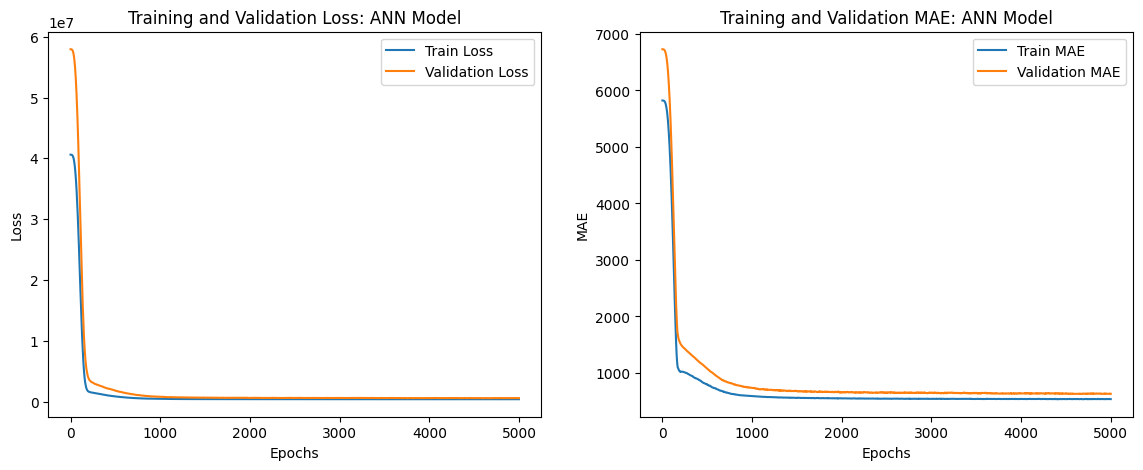

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

# Plot training loss and accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss: ANN Model')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE: ANN Model')

plt.show()
plt.savefig('results/ANN_training_validation_loss_mae.png')


In [21]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 577.0455846354166


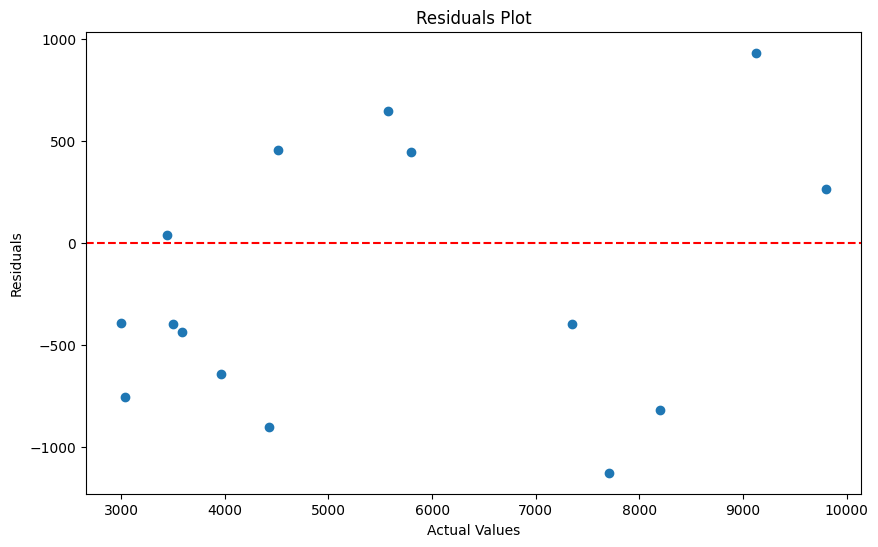

In [22]:
# Plot residuals
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
